# RFM Analysis

In [53]:
# import pytho modules for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Loading the Dataset

In [54]:
url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_customer_data.csv"
daily_customers_sales_df = pd.read_csv(url, parse_dates=['Date', 'MonthYear'])

# check the shape
daily_customers_sales_df.shape

(16766, 6)

* Preview the Dataset

In [55]:
daily_customers_sales_df.dtypes

CustomerID                      float64
Date                     datetime64[ns]
Country                          object
MonthYear                datetime64[ns]
TotalAmount                     float64
CountOfUniqueInvoices             int64
dtype: object

* Convert CustomerID from float64 to string

In [56]:
## using dictionary to convert specific columns
convert_dic = {
    'CustomerID': str
}
daily_customers_sales_df = daily_customers_sales_df.astype(convert_dic)

In [57]:
daily_customers_sales_df.head()

,CustomerID,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices
0,12346.0,2011-01-18,United Kingdom,2011-01-01,77183.60,1
1,12347.0,2010-12-07,Iceland,2010-12-01,711.79,1
2,12347.0,2011-01-26,Iceland,2011-01-01,475.39,1
3,12347.0,2011-04-07,Iceland,2011-04-01,636.25,1
4,12347.0,2011-06-09,Iceland,2011-06-01,382.52,1


### Summuary Statistics

In [58]:
daily_customers_sales_df.describe(include='all')

C:\Users\HP\AppData\Local\Temp\ipykernel_18896\821053191.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  daily_customers_sales_df.describe(include='all')
C:\Users\HP\AppData\Local\Temp\ipykernel_18896\821053191.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  daily_customers_sales_df.describe(include='all')


,CustomerID,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices
count,16766,16766,16766,16766,16766.000000,16766.000000
unique,4339,305,37,13,NaN,NaN
top,14911.0,2011-11-17 00:00:00,United Kingdom,2011-11-01 00:00:00,NaN,NaN
freq,132,125,15095,2391,NaN,NaN
first,NaN,2010-12-01 00:00:00,NaN,2010-12-01 00:00:00,NaN,NaN
last,NaN,2011-12-09 00:00:00,NaN,2011-12-01 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,531.516635,1.105571
std,NaN,NaN,NaN,NaN,1907.700011,0.444950
min,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,178.710000,1.000000


### Step 1: Creating an RFM Table
* Get the _First Invoice Date_ and _Last Invoice Date_ from the dataset.

In [59]:
## Getting first and last order date
print("Minimum Date: ", daily_customers_sales_df['Date'].min(), "Maximum Date: ", daily_customers_sales_df['Date'].max())

Minimum Date:  2010-12-01 00:00:00 Maximum Date:  2011-12-09 00:00:00


* In the dataset, the first Sales Date is __1st Dec. 2010__, and the Last Sales Date is __9th Dec. 2011__.
* We use the _Last Sales Date_ in the calculation of __RECENCY__. 

In [60]:
# add 1 day to get the 'todays' date
Now = daily_customers_sales_df['Date'].max() + dt.timedelta(days=1)
Now

Timestamp('2011-12-10 00:00:00')

* Create RFM Table using __groupby()__ function.

In [61]:
RFM_Table = daily_customers_sales_df.groupby('CustomerID').agg(
    # First Purchase Date
    FirstPurchaseDate = ('Date', lambda x: x.min()),
    # Last Purchase Date
    LastPurchaseDate = ('Date', lambda x: x.max()),
    # Recency
    Recency = ('Date', lambda x: (Now - x.max()).days),
    # Frequency
    Frequency = ('CustomerID', lambda x: len(x)),
    # Monetary Value
    MonetaryValue = ('TotalAmount', lambda x: x.sum().round(1)),
    # Tenure
    Tenure = ('Date', lambda x: (Now - x.min()).days),
    # MeanValue
    MeanValue = ('TotalAmount', lambda x: x.mean().round(1))
)

# save to Excel
RFM_Table.to_excel('RFM_Table_df.xlsx')

# Preview
RFM_Table

,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue
CustomerID,,,,,,,
12346.0,2011-01-18,2011-01-18,326,1,77183.6,326,77183.6
12347.0,2010-12-07,2011-12-07,3,7,4310.0,368,615.7
12348.0,2010-12-16,2011-09-25,76,4,1797.2,359,449.3
12349.0,2011-11-21,2011-11-21,19,1,1757.6,19,1757.6
12350.0,2011-02-02,2011-02-02,311,1,334.4,311,334.4
...,...,...,...,...,...,...,...
18280.0,2011-03-07,2011-03-07,278,1,180.6,278,180.6
18281.0,2011-06-12,2011-06-12,181,1,80.8,181,80.8
18282.0,2011-08-05,2011-12-02,8,2,178.0,127,89.0


### Step 2: Summary Statistics of the RFM Table

In [62]:
# Summary Statistics for our RFM Table
def describe(RFM_Table):
    return pd.concat([RFM_Table.describe().T,
                      # mean absolute deviation
                      RFM_Table.mad().rename('mad'),
                      RFM_Table.skew().rename('skew'),
                      RFM_Table.kurt().rename('kurt'),
                     ], axis=1).T
    
RFM_Table.describe(include='all')

C:\Users\HP\AppData\Local\Temp\ipykernel_18896\2945472602.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  RFM_Table.describe(include='all')
C:\Users\HP\AppData\Local\Temp\ipykernel_18896\2945472602.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  RFM_Table.describe(include='all')


,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue
count,4339,4339,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
unique,305,304,NaN,NaN,NaN,NaN,NaN
top,2010-12-01 00:00:00,2011-12-08 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,95,103,NaN,NaN,NaN,NaN,NaN
first,2010-12-01 00:00:00,2010-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2011-12-09 00:00:00,2011-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,93.041484,3.864024,2053.792855,223.782899,458.029062
std,NaN,NaN,100.007757,5.952745,8988.248186,117.883623,1929.039188
min,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,18.000000,1.000000,307.250000,113.000000,185.250000


### Step 3: Define Quartiles

In [63]:
quantiles = RFM_Table.quantile(q = [0.25, 0.5, 0.75])
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
print(quantiles)

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.5}, 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0}, 'MonetaryValue': {0.25: 307.25, 0.5: 674.4, 0.75: 1661.6}, 'Tenure': {0.25: 113.0, 0.5: 249.0, 0.75: 327.0}, 'MeanValue': {0.25: 185.25, 0.5: 304.5, 0.75: 451.15}}


C:\Users\HP\AppData\Local\Temp\ipykernel_18896\3733985124.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM_Table.quantile(q = [0.25, 0.5, 0.75])


### Step 4: RFM Segmentation

In [64]:
## RFM Segmentation
RFM_Segment = RFM_Table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4


RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['MonetaryValue'].apply(FM_Class, args=('MonetaryValue',quantiles,))

RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str)  + RFM_Segment.F_Quartile.map(str)  + RFM_Segment.M_Quartile.map(str)
RFM_Segment = RFM_Segment.sort_values(by = ['RFMClass', 'MonetaryValue'], ascending = [True, False])

RFM_Segment

,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,,,,,
15087.0,2011-03-03,2011-03-03,282,1,306.9,282,306.9,1,1,1,111
17551.0,2010-12-15,2010-12-15,360,1,306.8,360,306.8,1,1,1,111
13762.0,2011-05-05,2011-05-05,219,1,306.7,219,306.7,1,1,1,111
17176.0,2011-05-22,2011-05-22,202,1,306.1,202,306.1,1,1,1,111
13863.0,2011-04-06,2011-04-06,248,1,305.8,248,305.8,1,1,1,111
...,...,...,...,...,...,...,...,...,...,...,...
16813.0,2011-05-19,2011-12-01,9,10,1693.0,205,169.3,4,4,4,444
15380.0,2010-12-09,2011-12-01,9,5,1690.3,366,338.1,4,4,4,444
16115.0,2011-02-20,2011-11-30,10,8,1668.0,293,208.5,4,4,4,444


* Another possibility is to combine the scores to create one score (eg. 4+1+1). 
* This will create a score between 3 and 12. Here the advantage is that each of the scores got same importance. 
* However some scores will have many segements as constituents (eg - 413 ad 431)

In [65]:
# RFM Score
RFM_Segment['RFMScore'] = RFM_Segment['R_Quartile'] + RFM_Segment['F_Quartile'] + RFM_Segment['M_Quartile']

# Preview
RFM_Segment

,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore
CustomerID,,,,,,,,,,,,
15087.0,2011-03-03,2011-03-03,282,1,306.9,282,306.9,1,1,1,111,3
17551.0,2010-12-15,2010-12-15,360,1,306.8,360,306.8,1,1,1,111,3
13762.0,2011-05-05,2011-05-05,219,1,306.7,219,306.7,1,1,1,111,3
17176.0,2011-05-22,2011-05-22,202,1,306.1,202,306.1,1,1,1,111,3
13863.0,2011-04-06,2011-04-06,248,1,305.8,248,305.8,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...,...,...,...
16813.0,2011-05-19,2011-12-01,9,10,1693.0,205,169.3,4,4,4,444,12
15380.0,2010-12-09,2011-12-01,9,5,1690.3,366,338.1,4,4,4,444,12
16115.0,2011-02-20,2011-11-30,10,8,1668.0,293,208.5,4,4,4,444,12


* From the __RFM Segments__, we can calculate the some stats

In [67]:
RFM_Segment = RFM_Segment.reset_index()
RFM_Segment.groupby('RFMScore').agg(
    AverageScore = ('MonetaryValue', 'mean'),
    CountOfCustomers = ('CustomerID', 'nunique')
)

,AverageScore,CountOfCustomers
RFMScore,,
3,165.474836,457
4,291.431440,493
5,393.585417,480
6,824.696694,484
7,889.278860,421
8,1035.954337,392
9,1497.827020,396
10,2467.394150,359
11,3789.564800,375


### Step 5: Defining RFM Tiers
* We can further divide the customers into __RFM Tiers__ by binning together ranges of scores. 
* For example, we can say that customers with scores ranging from 3 to 5 are Bronze, from 5 to 9 are Silver and from 9 to 12 are Gold.

In [74]:
# group customers into different Tiers
def get_tier(df):
    if df['RFMScore'] >= 9:
        return 'GOLD'
    elif (df['RFMScore'] >= 5) and (df['RFMScore'] < 9):
        return 'SILVER'
    else:
        return "BRONZE"
    
RFM_Segment['Tier'] = RFM_Segment.apply(get_tier, axis=1)

# Preview
RFM_Segment


,index,CustomerID,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,Tier
0,0,15087.0,2011-03-03,2011-03-03,282,1,306.9,282,306.9,1,1,1,111,3,BRONZE
1,1,17551.0,2010-12-15,2010-12-15,360,1,306.8,360,306.8,1,1,1,111,3,BRONZE
2,2,13762.0,2011-05-05,2011-05-05,219,1,306.7,219,306.7,1,1,1,111,3,BRONZE
3,3,17176.0,2011-05-22,2011-05-22,202,1,306.1,202,306.1,1,1,1,111,3,BRONZE
4,4,13863.0,2011-04-06,2011-04-06,248,1,305.8,248,305.8,1,1,1,111,3,BRONZE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,4334,16813.0,2011-05-19,2011-12-01,9,10,1693.0,205,169.3,4,4,4,444,12,GOLD
4335,4335,15380.0,2010-12-09,2011-12-01,9,5,1690.3,366,338.1,4,4,4,444,12,GOLD
4336,4336,16115.0,2011-02-20,2011-11-30,10,8,1668.0,293,208.5,4,4,4,444,12,GOLD
4337,4337,12912.0,2011-10-30,2011-12-07,3,5,1662.3,41,332.5,4,4,4,444,12,GOLD


In [ ]:
# save Excel file
RFM_Segment.to_csv('RFM_Segments_df.csv', index=False)

In [69]:
#RFM_Segment = RFM_Segment.reset_index()
RFM_Segment.groupby('Tier').agg(
    AverageScore = ('MonetaryValue', 'mean'),
    CountOfCustomers = ('CustomerID', 'nunique')
)

,AverageScore,CountOfCustomers
Tier,,
BRONZE,230.839684,950
GOLD,4543.148139,1612
SILVER,770.148959,1777


### Step: Questions of Interest

RFM segmentation readily answers these questions for your business…:

* Who are my best customers?
* Which customers are at the verge of churning?
* Who are lost customers that you don’t need to pay much attention to?
* Who are your loyal customers?
* Which customers you must retain?
* Who has the potential to be converted into more profitable customers?
* Which group of customers is most likely to respond to your current campaign?

#### Question 1: Who Are My Best Customers?

In [70]:
RFM_Segment[RFM_Segment['RFMClass'] == '444'].sort_values('MonetaryValue', ascending=False)

,index,CustomerID,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,Tier
3857,3857,14646.0,2010-12-20,2011-12-08,2,45,280206.0,355,6226.8,4,4,4,444,12,GOLD
3858,3858,18102.0,2010-12-07,2011-12-09,1,26,259657.3,368,9986.8,4,4,4,444,12,GOLD
3859,3859,17450.0,2010-12-07,2011-12-01,9,27,194550.8,368,7205.6,4,4,4,444,12,GOLD
3860,3860,14911.0,2010-12-01,2011-12-08,2,132,143825.1,374,1089.6,4,4,4,444,12,GOLD
3861,3861,14156.0,2010-12-03,2011-11-30,10,43,117379.6,372,2729.8,4,4,4,444,12,GOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,4334,16813.0,2011-05-19,2011-12-01,9,10,1693.0,205,169.3,4,4,4,444,12,GOLD
4335,4335,15380.0,2010-12-09,2011-12-01,9,5,1690.3,366,338.1,4,4,4,444,12,GOLD
4336,4336,16115.0,2011-02-20,2011-11-30,10,8,1668.0,293,208.5,4,4,4,444,12,GOLD
4337,4337,12912.0,2011-10-30,2011-12-07,3,5,1662.3,41,332.5,4,4,4,444,12,GOLD


#### Question 2: Which Customers Are At the Verge of Churning?
* These are customers whose __Recency__ are low.

In [71]:
RFM_Segment[RFM_Segment['R_Quartile'] <= 2].sort_values('MonetaryValue', ascending=False)

,index,CustomerID,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,Tier
728,728,12346.0,2011-01-18,2011-01-18,326,1,77183.6,326,77183.6,1,1,4,114,6,SILVER
958,958,15749.0,2011-01-11,2011-04-18,236,2,44534.3,333,22267.2,1,2,4,124,7,SILVER
729,729,15098.0,2011-06-10,2011-06-10,183,1,39916.5,183,39916.5,1,1,4,114,6,SILVER
2077,2077,12744.0,2011-01-25,2011-10-19,52,6,21279.3,319,3546.5,2,4,4,244,10,GOLD
2078,2078,12939.0,2011-01-09,2011-10-06,65,6,11581.8,335,1930.3,2,4,4,244,10,GOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,454,17763.0,2011-03-21,2011-03-21,264,1,15.0,264,15.0,1,1,1,111,3,BRONZE
1293,1293,16878.0,2011-09-16,2011-09-16,85,1,13.3,85,13.3,2,1,1,211,4,BRONZE
455,455,17956.0,2011-04-04,2011-04-04,250,1,12.8,250,12.8,1,1,1,111,3,BRONZE
1294,1294,14792.0,2011-10-07,2011-10-07,64,1,6.2,64,6.2,2,1,1,211,4,BRONZE


#### Question 3: Who Are The Lost Customers?
* These are customers whose __Recency__, __Frequency__ and __Monetary Value__ valsues are low.

In [72]:
RFM_Segment[RFM_Segment['RFMClass'] == '111'].sort_values('Recency', ascending=False)

,index,CustomerID,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,Tier
38,38,17968.0,2010-12-01,2010-12-01,374,1,277.4,374,277.4,1,1,1,111,3,BRONZE
132,132,13065.0,2010-12-01,2010-12-01,374,1,205.9,374,205.9,1,1,1,111,3,BRONZE
221,221,14237.0,2010-12-01,2010-12-01,374,1,161.0,374,161.0,1,1,1,111,3,BRONZE
372,372,17643.0,2010-12-01,2010-12-01,374,1,101.6,374,101.6,1,1,1,111,3,BRONZE
327,327,15350.0,2010-12-01,2010-12-01,374,1,115.6,374,115.6,1,1,1,111,3,BRONZE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,164,14722.0,2011-07-15,2011-07-15,148,1,187.9,148,187.9,1,1,1,111,3,BRONZE
401,401,13967.0,2011-07-17,2011-07-17,146,1,80.7,146,80.7,1,1,1,111,3,BRONZE
247,247,17984.0,2011-07-17,2011-07-17,146,1,152.7,146,152.7,1,1,1,111,3,BRONZE
391,391,14117.0,2011-07-19,2011-07-19,144,1,90.0,144,90.0,1,1,1,111,3,BRONZE


#### Question 4: Who Are Loyal Customers?
* These are customers with __Hight Frequency__ Value.

In [73]:
RFM_Segment[RFM_Segment['F_Quartile'] >= 3].sort_values('MonetaryValue', ascending=False)

,index,CustomerID,FirstPurchaseDate,LastPurchaseDate,Recency,Frequency,MonetaryValue,Tenure,MeanValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,Tier
3857,3857,14646.0,2010-12-20,2011-12-08,2,45,280206.0,355,6226.8,4,4,4,444,12,GOLD
3858,3858,18102.0,2010-12-07,2011-12-09,1,26,259657.3,368,9986.8,4,4,4,444,12,GOLD
3859,3859,17450.0,2010-12-07,2011-12-01,9,27,194550.8,368,7205.6,4,4,4,444,12,GOLD
3860,3860,14911.0,2010-12-01,2011-12-08,2,132,143825.1,374,1089.6,4,4,4,444,12,GOLD
3024,3024,12415.0,2011-01-06,2011-11-15,25,16,124914.5,338,7807.2,3,4,4,344,11,GOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,1764,16462.0,2011-03-01,2011-09-27,74,3,136.0,284,45.3,2,3,1,231,6,SILVER
3515,3515,14836.0,2011-11-09,2011-11-29,11,3,102.4,31,34.2,4,3,1,431,8,SILVER
2669,2669,17024.0,2011-07-05,2011-10-25,46,3,95.8,158,32.0,3,3,1,331,7,SILVER
1064,1064,18037.0,2010-12-12,2011-07-08,155,6,70.0,363,11.7,1,4,1,141,6,SILVER


### Step: Visualizations

Text(0.5, 0, 'Total Score')

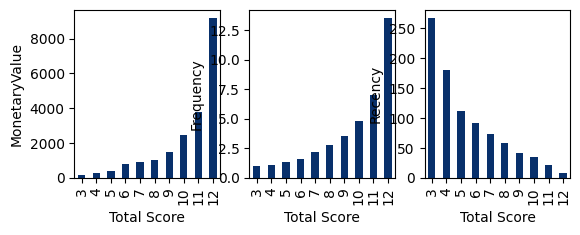

In [ ]:
## Visualizations
ax1 = plt.subplot(2, 3, 1) # number of row = 1, number of columns = 2, subplot order = 1 
ax1 = RFM_Segment.groupby('TotalScore').agg('MonetaryValue').mean().plot(kind = 'bar', colormap = 'Blues_r')
ax1.set_ylabel('MonetaryValue')
ax1.set_xlabel('Total Score')

ax2 = plt.subplot(2, 3, 2)
ax2 = RFM_Segment.groupby('TotalScore').agg('Frequency').mean().plot(kind='bar', colormap='Blues_r')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Total Score')

ax3 = plt.subplot(2, 3, 3)
ax3 = RFM_Segment.groupby('TotalScore').agg('Recency').mean().plot(kind='bar', colormap='Blues_r')
ax3.set_ylabel('Recency')
ax3.set_xlabel('Total Score')